## Import Libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Import The Data

In [70]:
df = pd.read_csv('/Users/ramazansamilacak/Desktop/IMDb/imdb_top_1000.csv')

## Basic Information About The Data

In [4]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [5]:
df.shape

(1000, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [7]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [9]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

## Nan Values

In [11]:
df.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

## Handling Missing Values

### Certificate 

In [73]:
most_common_certificate = df['Certificate'].mode()[0]
print(most_common_certificate)

U


In [74]:
df['Certificate'].value_counts()

Certificate
U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: count, dtype: int64

In [75]:
# We fill Null values with the most common value.
df['Certificate'].fillna('U',inplace=True)

### Meta_score

In [77]:
df['Meta_score'].value_counts()

Meta_score
76.0    32
84.0    29
90.0    29
80.0    27
73.0    27
        ..
28.0     1
36.0     1
46.0     1
30.0     1
41.0     1
Name: count, Length: 63, dtype: int64

In [78]:
# We fill the null values with the meta score average
df['Meta_score'].fillna(df['Meta_score'].mean(),inplace=True)

### Gross 

In [87]:
print(df['Gross'].dtype)

object


In [88]:
# Remove commas in the Gross column and convert the column to float type
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

print(df['Gross'].dtype)

float64


In [89]:
# filling NaN values with Gross mean value
df['Gross'] = df['Gross'].fillna(df['Gross'].mean())

## Analis and Visualisation of Data

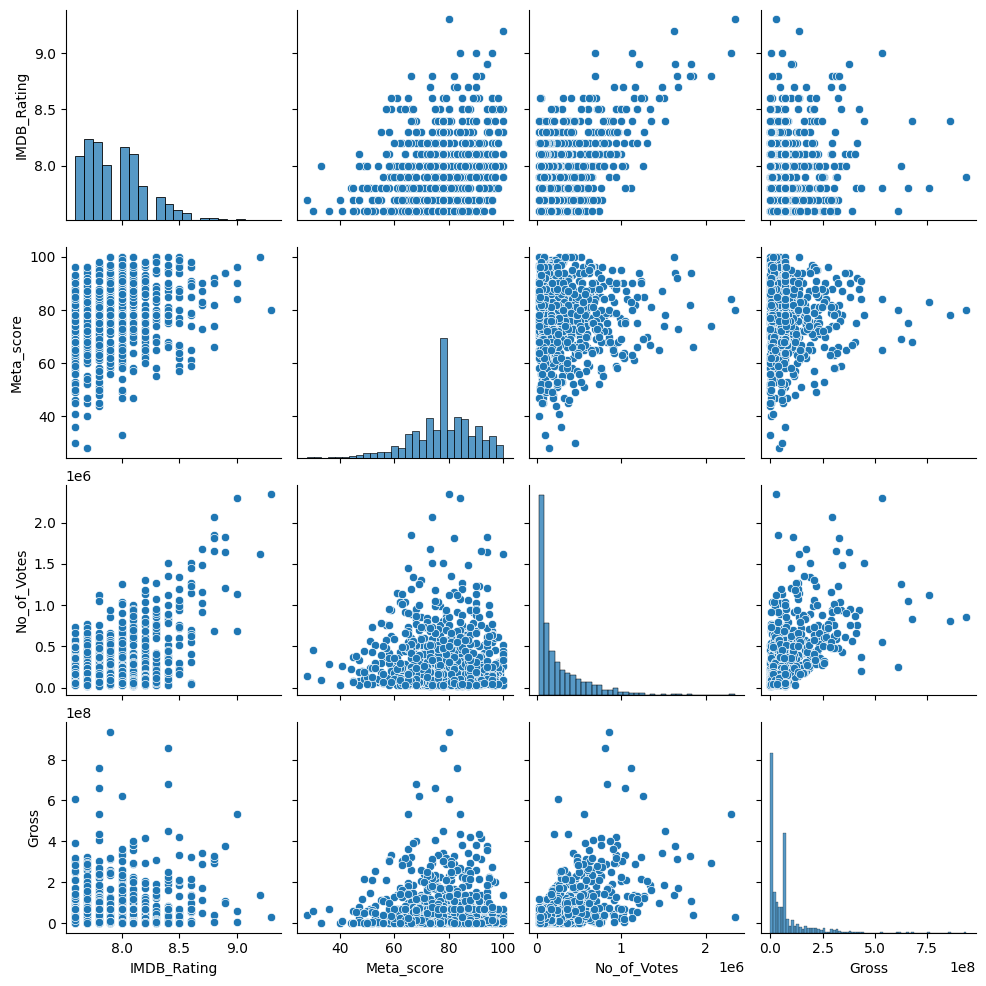

In [113]:
sns.pairplot(df)
# We can observe the correlation relationships of all numerical columns.

## Top 10 series by Imdb raking

In [92]:
top_10_imdb_series = df.sort_values(by = 'IMDB_Rating', ascending=False).head(10)
print(top_10_imdb_series[['Series_Title', 'IMDB_Rating']])

                                         Series_Title  IMDB_Rating
0                            The Shawshank Redemption          9.3
1                                       The Godfather          9.2
2                                     The Dark Knight          9.0
3                              The Godfather: Part II          9.0
4                                        12 Angry Men          9.0
5       The Lord of the Rings: The Return of the King          8.9
6                                        Pulp Fiction          8.9
7                                    Schindler's List          8.9
10  The Lord of the Rings: The Fellowship of the Ring          8.8
11                                       Forrest Gump          8.8


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


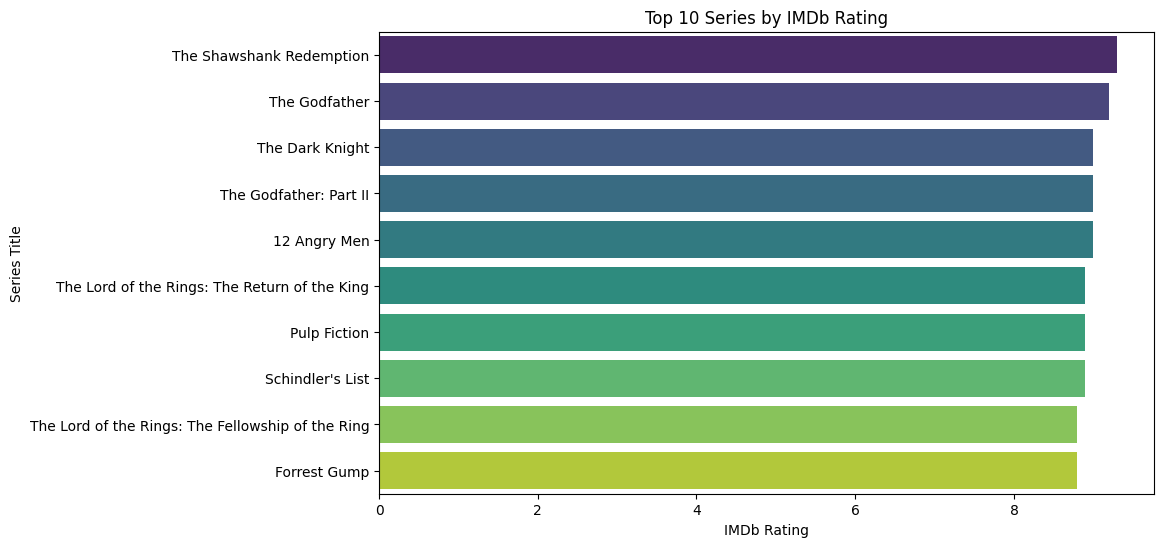

In [93]:
plt.figure(figsize=(10, 6))
sns.barplot(x='IMDB_Rating', y='Series_Title', data=top_10_imdb_series, palette='viridis', hue='Series_Title', dodge=False)
plt.title('Top 10 Series by IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Series Title')
plt.legend().set_visible(False)  
plt.show()

## Genre By Meta Score

In [94]:
genre_by_meta_score = df.sort_values(by= 'Meta_score', ascending=False).head(10)
print(genre_by_meta_score[['Genre', 'Meta_score']])

                           Genre  Meta_score
491                        Drama       100.0
116  Adventure, Biography, Drama       100.0
81             Mystery, Thriller       100.0
274                        Drama       100.0
440             Drama, Film-Noir       100.0
423                        Drama       100.0
260      Drama, Mystery, Romance       100.0
1                   Crime, Drama       100.0
559    Drama, Film-Noir, Romance       100.0
50           Drama, Romance, War       100.0


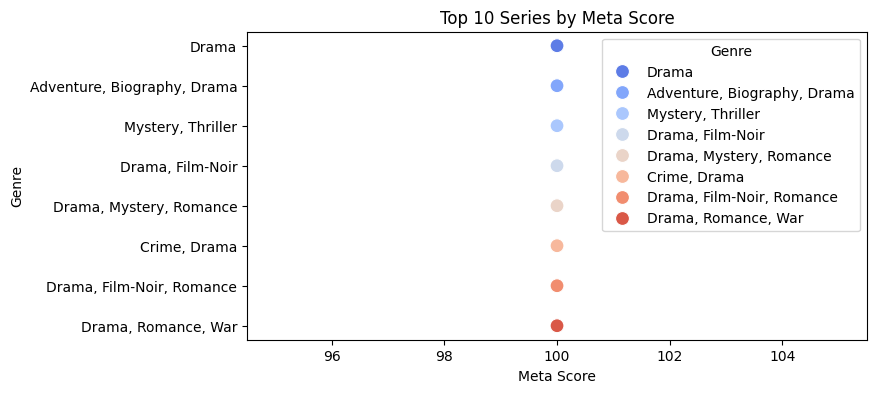

In [95]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Meta_score', y='Genre', data=genre_by_meta_score, hue='Genre', palette='coolwarm', s=100)
plt.title('Top 10 Series by Meta Score')
plt.xlabel('Meta Score')
plt.ylabel('Genre')
plt.show()

## Genre By Imdb Score

In [97]:
genre_by_imdb_score = df.sort_values(by= 'IMDB_Rating', ascending=False).head(10)
print(genre_by_imdb_score[['Genre', 'IMDB_Rating']])

                        Genre  IMDB_Rating
0                       Drama          9.3
1                Crime, Drama          9.2
2        Action, Crime, Drama          9.0
3                Crime, Drama          9.0
4                Crime, Drama          9.0
5    Action, Adventure, Drama          8.9
6                Crime, Drama          8.9
7   Biography, Drama, History          8.9
10   Action, Adventure, Drama          8.8
11             Drama, Romance          8.8


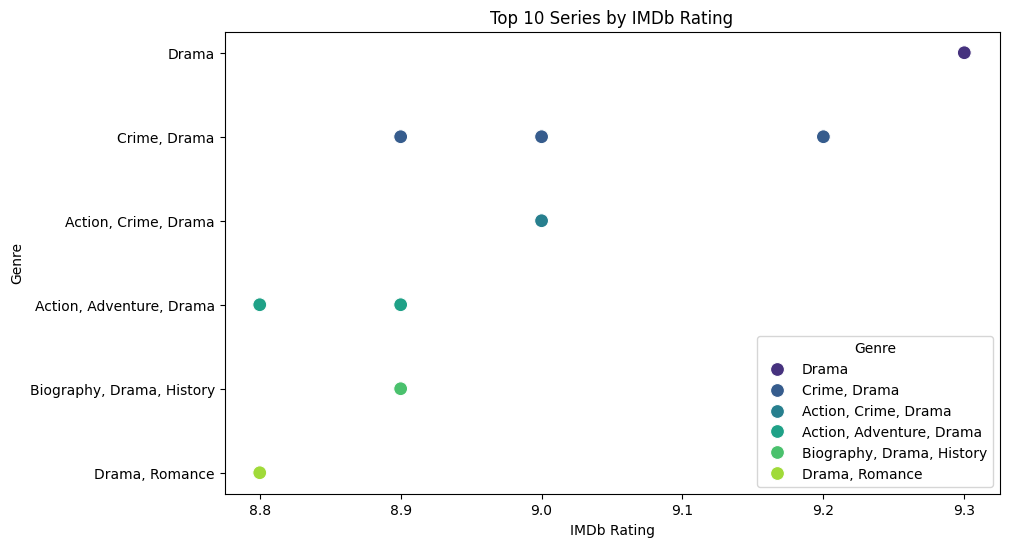

In [98]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Genre', data=genre_by_imdb_score, hue='Genre', palette='viridis', s=100)
plt.title('Top 10 Series by IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Genre')
plt.show()

## Total Series by Released Year

In [99]:
total_series_by_year = df['Released_Year'].value_counts().sort_index()

In [100]:
total_series_by_year

Released_Year
1920     1
1921     1
1922     1
1924     1
1925     2
        ..
2017    22
2018    19
2019    23
2020     6
PG       1
Name: count, Length: 100, dtype: int64

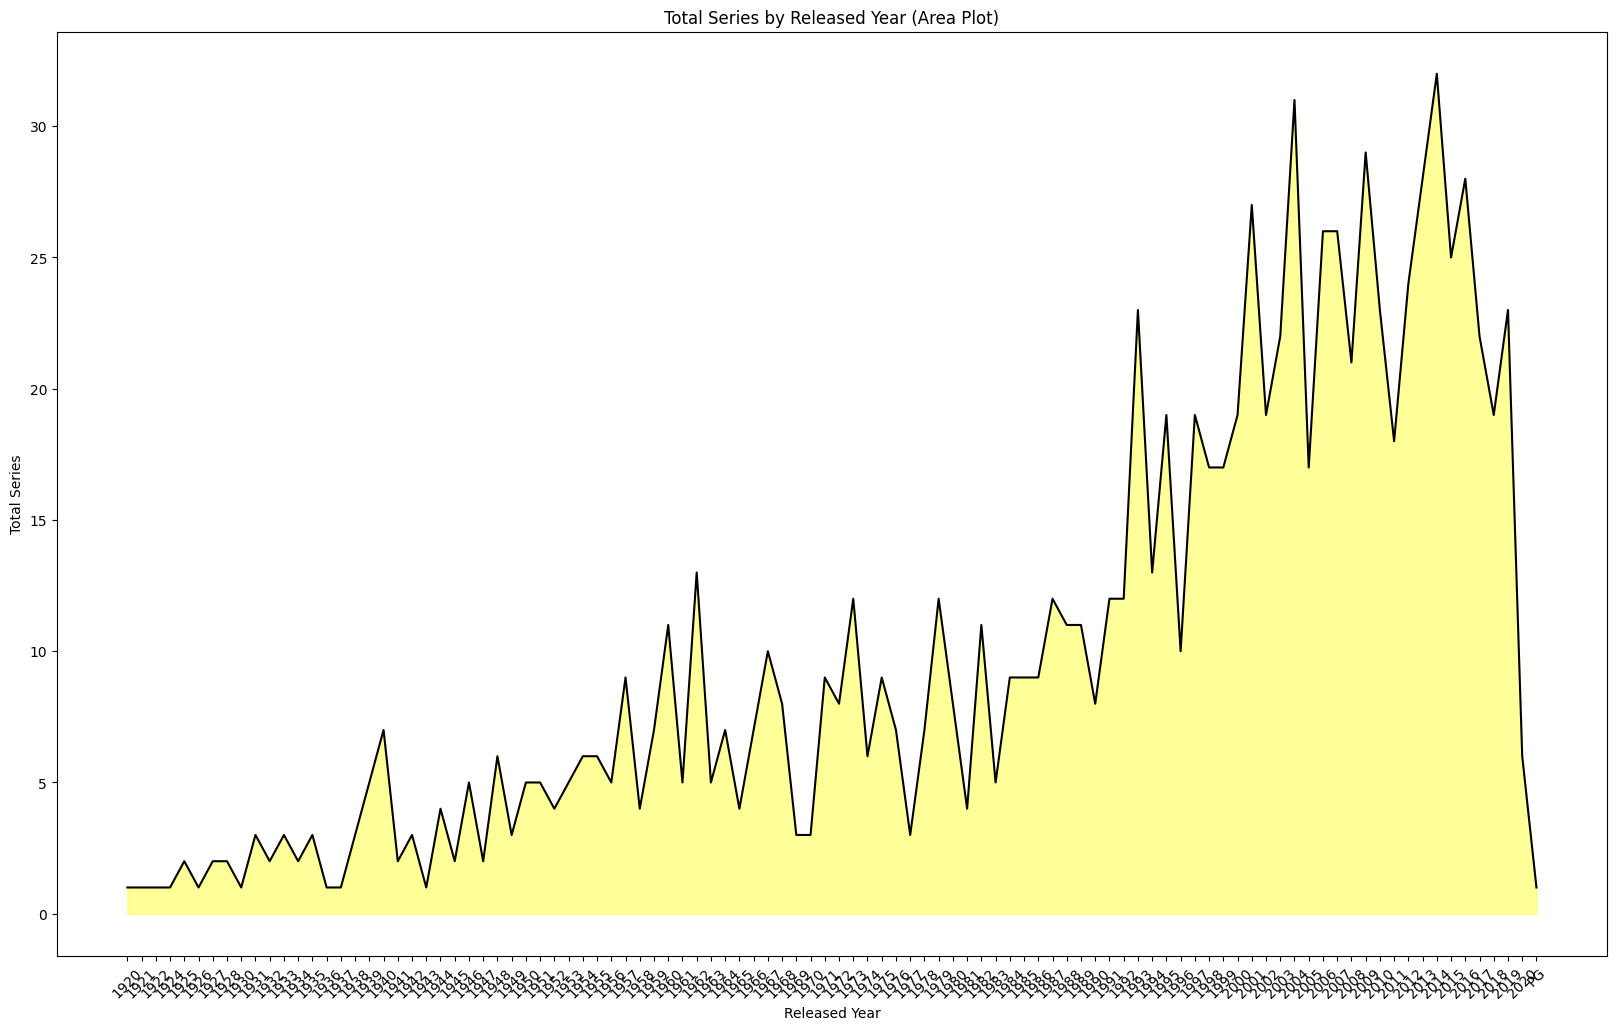

In [103]:
plt.figure(figsize=(20, 12))
sns.lineplot(x=total_series_by_year.index, y=total_series_by_year.values, color='black')
plt.fill_between(total_series_by_year.index, total_series_by_year.values, color='yellow', alpha=0.4)
plt.title('Total Series by Released Year (Area Plot)')
plt.xlabel('Released Year')
plt.ylabel('Total Series')
plt.xticks(rotation=45)
plt.show()

## Total Gross By Years

In [110]:
total_gross_by_year = df.groupby('Released_Year')['Gross'].sum()

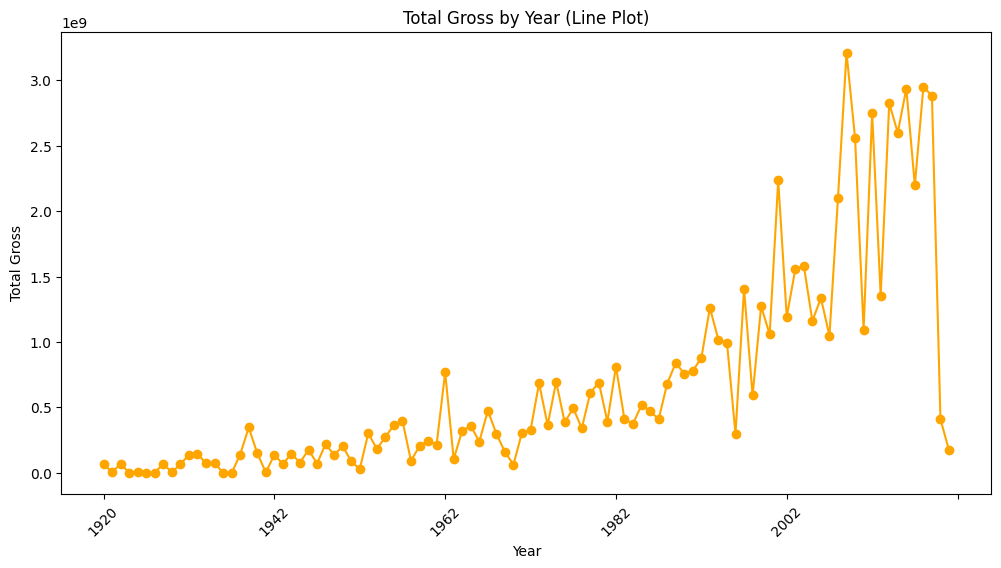

In [112]:
plt.figure(figsize=(12, 6))
total_gross_by_year.plot(kind='line', marker='o', color='orange')
plt.title('Total Gross by Year (Line Plot)')
plt.xlabel('Year')
plt.ylabel('Total Gross')
plt.xticks(rotation=45)

plt.show()

## Corelation of all data 

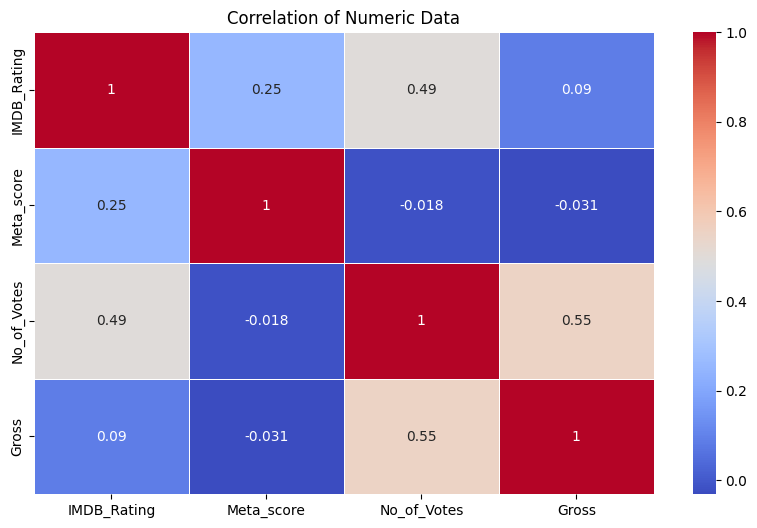

In [91]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Sayısal değerlerin korelasyon matrisini oluştur
correlation_matrix = numeric_df.corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation of Numeric Data')
plt.show()

## Coralation between IMDB Rating and Number of Votes

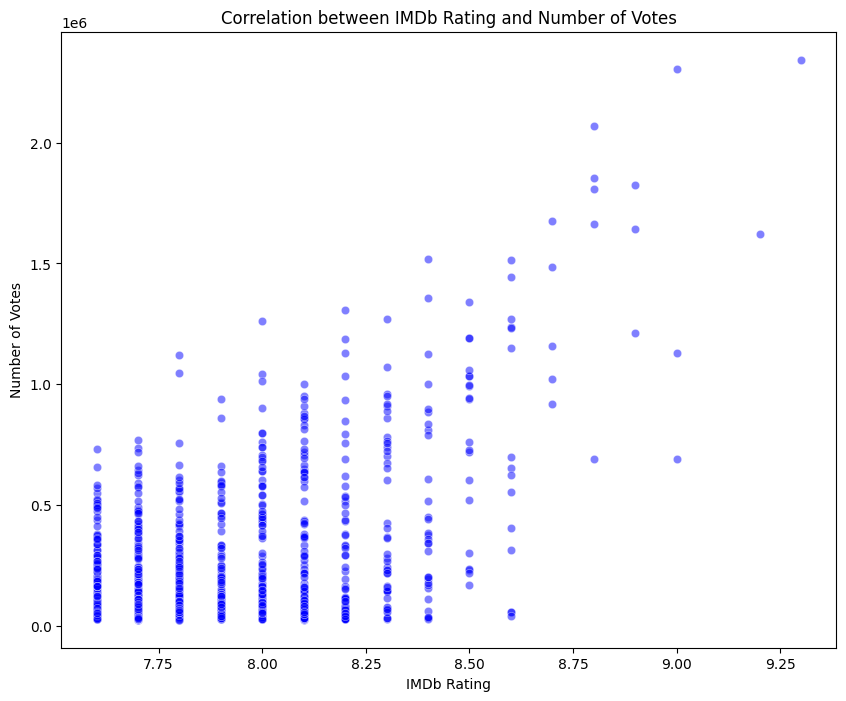

In [104]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='IMDB_Rating', y='No_of_Votes', data=df, color='blue', alpha=0.5)
plt.title('Correlation between IMDb Rating and Number of Votes')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Votes')
plt.show()

## Corelation Between Gross and Number of Votes

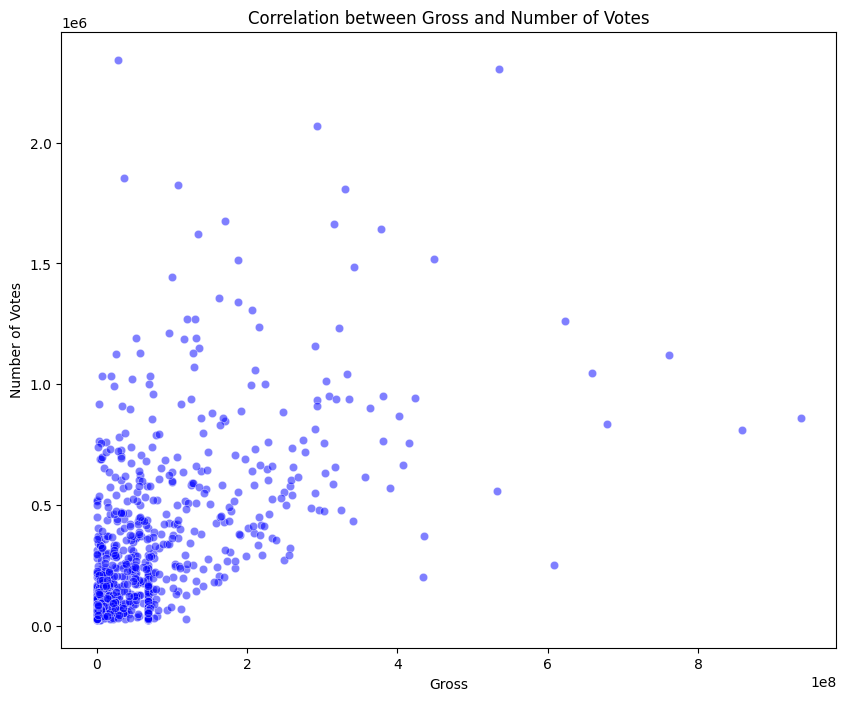

In [105]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Gross', y='No_of_Votes', data=df, color='blue', alpha=0.5)
plt.title('Correlation between Gross and Number of Votes')
plt.xlabel('Gross')
plt.ylabel('Number of Votes')
plt.show()